# Data Cleaning and Analysis by Kexin Fu

In [ ]:
# Data Gathering

In [1]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import requests

In [2]:
# save file 1 to dataframe
import requests
url='https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/twitter-archive-enhanced.csv'
response=requests.get(url)
with open('twitter-archive-enhanced.csv',mode='wb')as file:
    file.write(response.content)
df1=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# save file 2 to dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df2=pd.read_csv('image-predictions.tsv', sep='\t')

In [4]:
# save file 3 to dataframe
tweet_list=[]
with open ('tweet_json.txt','r') as f:
    for row in f:
        json_dict=json.loads(row)
        to_append={'tweet_id':json_dict['id_str'],
                  'retweet_count':json_dict['retweet_count'],
                  'favorite_count':json_dict['favorite_count']
                  }
        tweet_list.append(to_append)
tweet=pd.DataFrame(tweet_list,columns=['tweet_id','retweet_count','favorite_count'])

In [5]:
# Visual evaluation

In [ ]:
# Programmatic Evaluation

In [10]:
#twitter-archive evaluation
print(df1.info())
print(df1.describe())
print(sum(df1['retweeted_status_id'].notnull()))
print(sum(df1['retweeted_status_user_id'].notnull()))
print(sum(df1['retweeted_status_timestamp'].notnull()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
#image-prediction evluation
print(df2.info())
print(df2.describe())
print(sum(df2.jpg_url.duplicated()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None
           tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.38862

In [12]:
#tweet_json evaluation
print(tweet.info())
print(tweet['retweet_count'].describe())
print(tweet['favorite_count'].describe())
print(tweet.keys())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null object
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB
None
count     2352.000000
mean      3134.932398
std       5237.846296
min          0.000000
25%        618.000000
50%       1456.500000
75%       3628.750000
max      79116.000000
Name: retweet_count, dtype: float64
count      2352.000000
mean       8109.198980
std       11980.795669
min           0.000000
25%        1417.000000
50%        3596.500000
75%       10118.000000
max      132318.000000
Name: favorite_count, dtype: float64
Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')


In [ ]:
# Data cleaning

df1_clean=df1.copy()
df2_clean=df2.copy()
tweet_clean=tweet.copy()

In [15]:
# Quality Problem 1: Remove redundant text in source column
from bs4 import BeautifulSoup
df_list=[]
for i in df1.source:
    soup=BeautifulSoup(i,'lxml')
    source=soup.find('a').string
    df_list.append(source)
df1['source']=df_list

In [16]:
# Quality Problem 1. Test
print(df1['source'].head(10))

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
5    Twitter for iPhone
6    Twitter for iPhone
7    Twitter for iPhone
8    Twitter for iPhone
9    Twitter for iPhone
Name: source, dtype: object


In [17]:
# Quality problem 2: extract ratings from text and change data types to float
rating = df1_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
df1_clean['rating_numerator'] = rating['rating_numerator'].astype(float)
df1_clean['rating_denominator'] = rating['rating_denominator'].astype(float)

In [18]:
# Quality problem 2: Test
print(df1_clean[['rating_numerator','rating_denominator']])

      rating_numerator  rating_denominator
0                13.00                10.0
1                13.00                10.0
2                12.00                10.0
3                13.00                10.0
4                12.00                10.0
5                13.00                10.0
6                13.00                10.0
7                13.00                10.0
8                13.00                10.0
9                14.00                10.0
10               13.00                10.0
11               13.00                10.0
12               13.00                10.0
13               12.00                10.0
14               13.00                10.0
15               13.00                10.0
16               12.00                10.0
17               13.00                10.0
18               13.00                10.0
19               13.00                10.0
20               12.00                10.0
21               13.00                10.0
22         

In [19]:
# Quality problem 3. change data type of tweet_id
df1_clean['tweet_id']=df1_clean['tweet_id'].astype('str')

In [20]:
# Quality problem 3. Test
print(df1_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(6), object(

In [21]:
# Quality Problem 4: Innacurate items in name column, extract name from text required
df1_clean['name']=df1_clean.text.str.findall('(?:This is|named|Meet|Say hello to|name is|Here we have|Here is)\s([A-Z][^\s.,]*)')
df1_clean['name'] = df1_clean['name'].apply(lambda x: ','.join(set(x)))
df1_clean['name']=df1_clean['name'].replace('',np.nan) 
print(df1_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          1536 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(6), object(

In [22]:
# Quality Problem 4: Test
print(df1_clean['name'].value_counts().head(10))

Charlie    12
Oliver     11
Lucy       11
Cooper     11
Lola       10
Tucker     10
Penny      10
Bo          9
Winston     9
Sadie       8
Name: name, dtype: int64


In [23]:
# Quality Problem 5: As project required, delete rows with retweet information
df1_clean = df1_clean[df1_clean.retweeted_status_id.isnull()]
del df1_clean['retweeted_status_id']
del df1_clean['retweeted_status_user_id']
del df1_clean['retweeted_status_timestamp']

In [24]:
# Quality Problem 5: Test
print(df1_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null float64
name                     1424 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(4), object(10)
memory usage: 254.9+ KB
None


In [25]:
# Quality Problem 6：change data type of tweet_id
df2_clean['tweet_id']=df2_clean['tweet_id'].astype('str')

In [26]:
# Quality Problem 6: Test
print(df2_clean.info())
print(tweet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null object
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB
None


In [37]:
# Tidyness Problem 1：Create a new column representing different dog types, which are variables
# Qualtiy Problem 7：too many missing values in doggo,floofer,pupper,puppo columns; needs re-extracting from text
df1_clean['growstage']=df1_clean.text.str.lower().str.findall('(doggo|floofer|pupper|puppo)')
df1_clean['growstage']=df1_clean['growstage'].apply(lambda x:','.join(set(x)))
df1_clean['growstage']=df1_clean['growstage'].replace('',np.nan)
del df1_clean['doggo']
del df1_clean['floofer']
del df1_clean['pupper']
del df1_clean['puppo']

In [38]:
# Tidyness Problem 1: Test
# Quality Problem 7: Test
df1_clean['growstage'].value_counts().head(10)

pupper           250
doggo             82
puppo             31
pupper,doggo      10
floofer            9
doggo,puppo        2
doggo,floofer      1
Name: growstage, dtype: int64

In [39]:
# Quality Problem 8: Merge three datasets on Tweet_id. 
# Inner join required to guarantee all records have pictures.
all_columns = pd.Series(list(df1_clean) + list(df2_clean)+list(tweet_clean) )
print(all_columns[all_columns.duplicated()])
print(sum(df2_clean['jpg_url'].isnull()))
df_clean1=df1_clean.merge(df2_clean,how='inner',on='tweet_id').merge(tweet_clean,how='inner',on='tweet_id')

11    tweet_id
23    tweet_id
dtype: object
0


In [40]:
# Quality Problem 8: Test
print(df_clean1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 24 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null float64
name                     1381 non-null object
growstage                342 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null bool
p3                     

In [41]:
# Save dataset to csv 
df_clean1.to_csv('twitter_archive_master.csv',index=False)

In [ ]:
# Analysis and Visualization

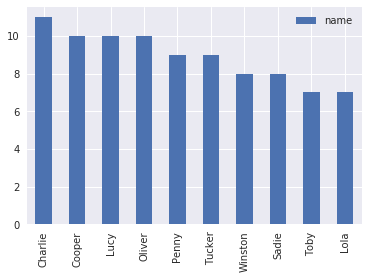

In [42]:
# Conclusion 1:
# What is people's favourite dog name?
m1=df_clean1.name.value_counts().head(10)
dfm=pd.DataFrame(m1)
dfm.plot.bar()

Conclusion: The most frequent dog names are Charlie, Cooper and Lucy.

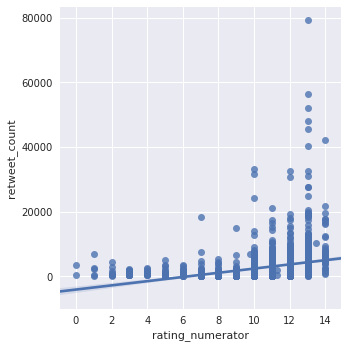

In [33]:
# Conclusion 2：
# Is dog rating related to retweet numbers？
df_favorite=df_clean1[['rating_numerator','retweet_count']]
df_favorite=df_favorite[df_favorite.rating_numerator<20]
import seaborn as sns
sns.set_style("white")
%matplotlib inline
sns.set(style="darkgrid")
sns.lmplot(x='rating_numerator', y='retweet_count',data = df_favorite)
plt.show()

Conclusion: Dog ratings has a positive correlation with retweet counts.

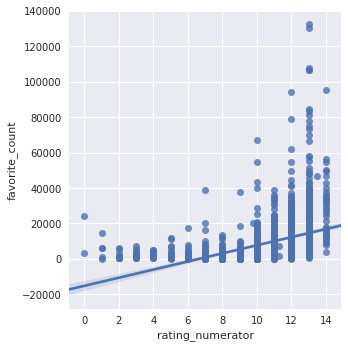

In [34]:
# Conclusion 3:
# Is dog rating related to favorite counts?
df_favorite=df_clean1[['rating_numerator','favorite_count']]
df_favorite=df_favorite[df_favorite.rating_numerator<20]
import seaborn as sns
sns.set_style("white")
%matplotlib inline
sns.set(style="darkgrid")
sns.lmplot(x='rating_numerator', y='favorite_count',data = df_favorite)
plt.show()

Dog ratings has a positive correlation with favourite counts.

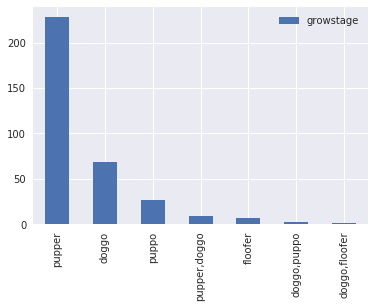

In [36]:
# Visualization
m2=df_clean1['growstage'].value_counts().head(10)
dfm2=pd.DataFrame(m2)
dfm2.plot.bar()

Conclusion: Most dogs are in pupper stage.